<a href="https://colab.research.google.com/github/GouthamKumar-R/Colab/blob/main/EDA_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Overview 

Attrition, refers to the phenomenon of the employees leaving the company. Employee attrition is always the focus of Human Resource Management. This project aims to predict factors affecting employee attrition.

Dataset :https://raw.githubusercontent.com/GouthamKumar-R/ML/master/D20%20-%20IML/Assignments/EDA%20%2B%20DV/attrition.csv

Libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')  

import warnings           
warnings.filterwarnings("ignore")    

Importing Files to Colab

In [3]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving attrition.csv to attrition.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['attrition.csv']))

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [7]:
df.shape

(1470, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   EducationField           1470 non-null   object
 5   EnvironmentSatisfaction  1470 non-null   int64 
 6   Gender                   1470 non-null   object
 7   JobInvolvement           1470 non-null   int64 
 8   JobLevel                 1470 non-null   int64 
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  OverTime                 1470 non-null   object
 13  TotalWorkingYears        1470 non-null   int64 
 14  WorkLifeBalance          1470 non-null  

From the above result, we can infer that there are no NULL values

In [9]:
allcolumns = df.columns.tolist()
allcolumns

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'TotalWorkingYears',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'DistanceFromHome']

Splitting **Categorical** and **Numerical** features

In [64]:
df_cat = df[['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime',
        'WorkLifeBalance']]
df_cat.tail()

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance
1465,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,No,3
1466,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,No,3
1467,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,Yes,3
1468,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,No,2
1469,0,Travel_Rarely,Research & Development,Medical,2,Male,4,2,3,Married,No,4


In [37]:
df_num = df[['Attrition','Age','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome' ]]
df_num.head()

,Attrition,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,1,41,5993,8,6,4,0,5,1
1,0,49,5130,10,10,7,1,7,8
2,1,37,2090,7,0,0,0,0,2
3,0,33,2909,8,8,7,3,0,3
4,0,27,3468,6,2,2,2,2,2


### **Univaritate Analysis:**

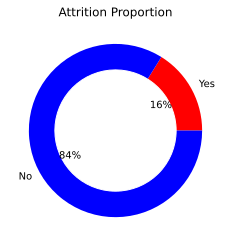

In [28]:
Y_count = len(df[df['Attrition'] == 1])
N_count = len(df[df['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['Red','Blue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show() 

Graphs for Attrition:
Total_no. of categories:2


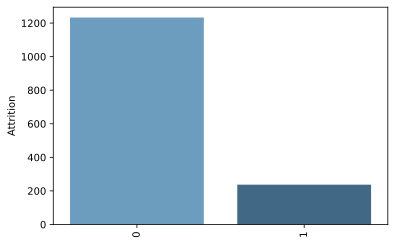

Graphs for BusinessTravel:
Total_no. of categories:3


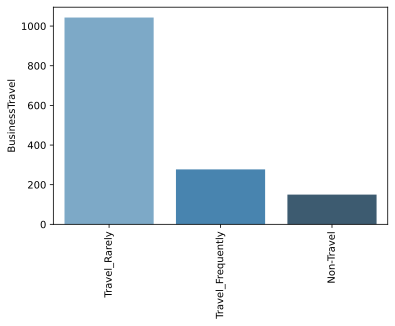

Graphs for Department:
Total_no. of categories:3


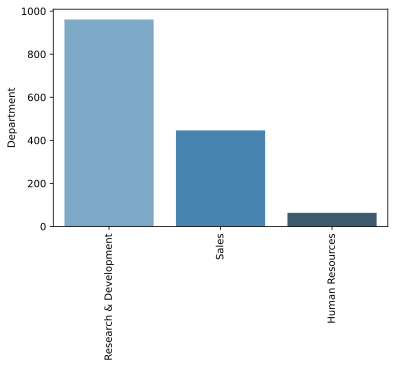

Graphs for EducationField:
Total_no. of categories:6


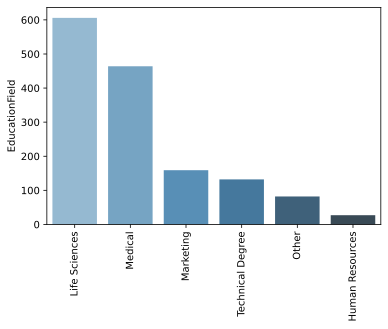

Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


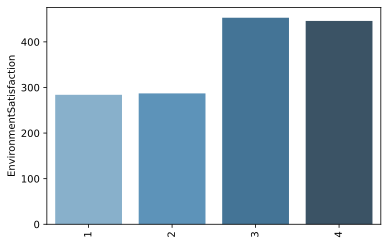

Graphs for Gender:
Total_no. of categories:2


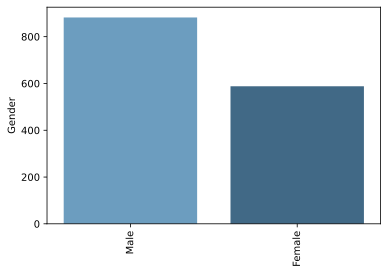

Graphs for JobInvolvement:
Total_no. of categories:4


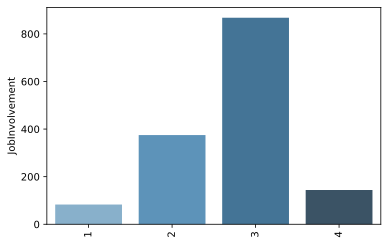

Graphs for JobLevel:
Total_no. of categories:5


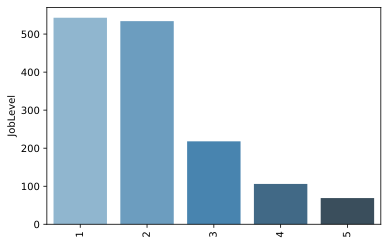

Graphs for JobSatisfaction:
Total_no. of categories:4


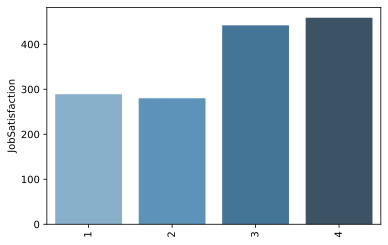

Graphs for MaritalStatus:
Total_no. of categories:3


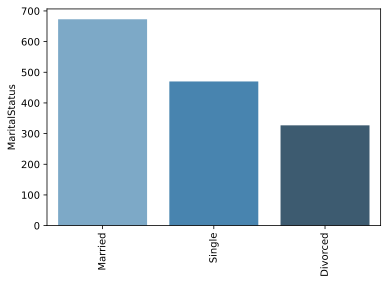

Graphs for OverTime:
Total_no. of categories:2


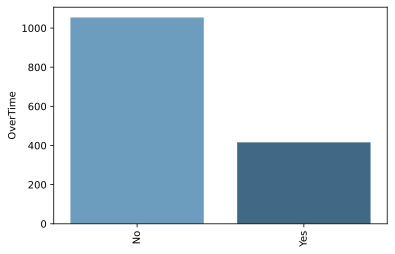

Graphs for WorkLifeBalance:
Total_no. of categories:4


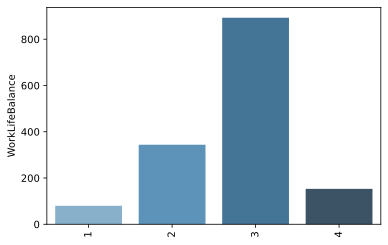

In [65]:
#Categorical variables: count, count distinct, Unique values

for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print("Graphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num, palette="Blues_d")
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

Graphs for Attrition:
Minmum value of Attrition is :0
Maximum value of Attritionis:1


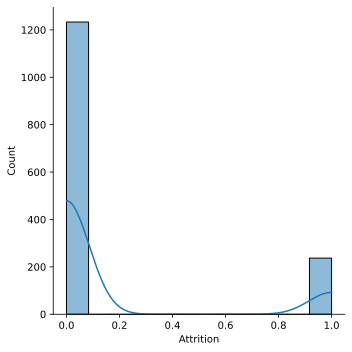

Graphs for Age:
Minmum value of Age is :18
Maximum value of Ageis:60


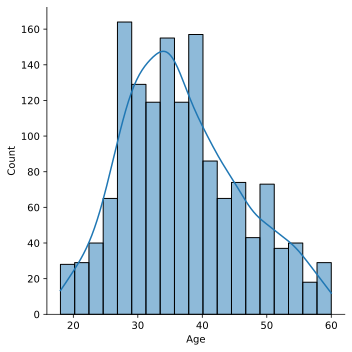

Graphs for MonthlyIncome:
Minmum value of MonthlyIncome is :1009
Maximum value of MonthlyIncomeis:19999


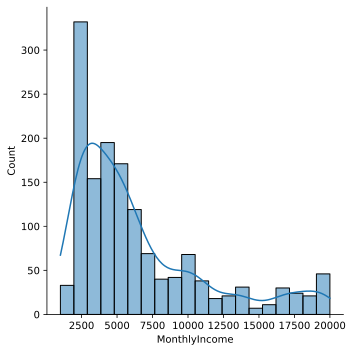

Graphs for TotalWorkingYears:
Minmum value of TotalWorkingYears is :0
Maximum value of TotalWorkingYearsis:40


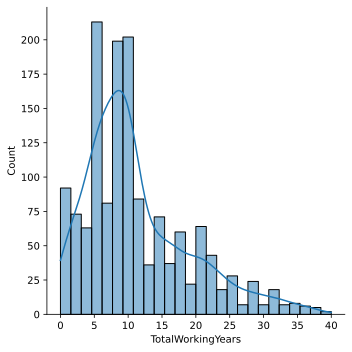

Graphs for YearsAtCompany:
Minmum value of YearsAtCompany is :0
Maximum value of YearsAtCompanyis:40


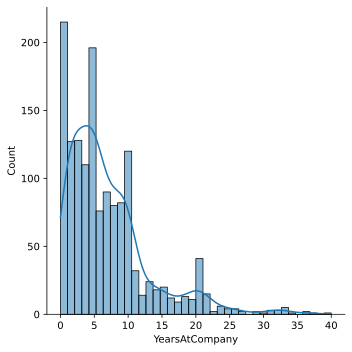

Graphs for YearsInCurrentRole:
Minmum value of YearsInCurrentRole is :0
Maximum value of YearsInCurrentRoleis:18


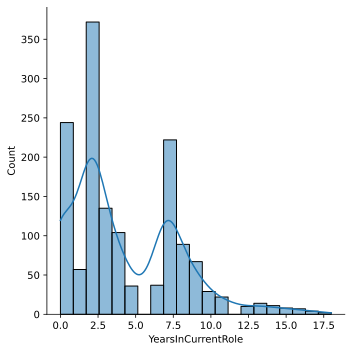

Graphs for YearsSinceLastPromotion:
Minmum value of YearsSinceLastPromotion is :0
Maximum value of YearsSinceLastPromotionis:15


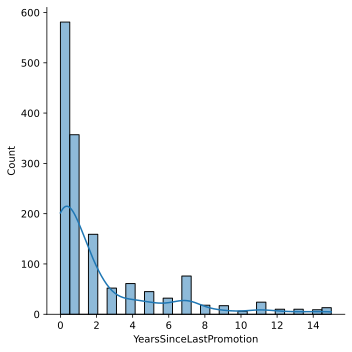

Graphs for YearsWithCurrManager:
Minmum value of YearsWithCurrManager is :0
Maximum value of YearsWithCurrManageris:17


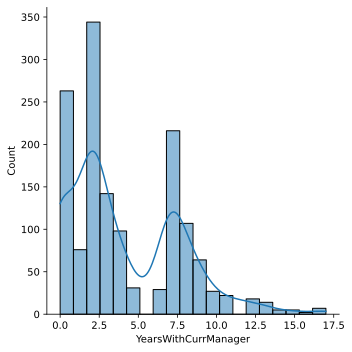

Graphs for DistanceFromHome:
Minmum value of DistanceFromHome is :1
Maximum value of DistanceFromHomeis:29


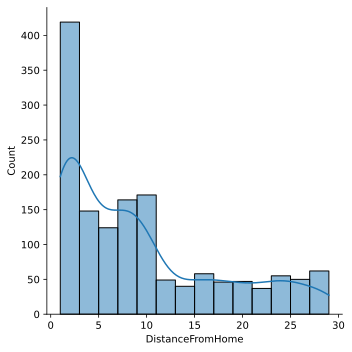

In [38]:
#Numerical: count, min, max
for i in df_num:
  min = df_num[i].min()
  max = df_num[i].max()
  print("Graphs for %s:\nMinmum value of %s is :%d\nMaximum value of %sis:%d" %(i,i,min,i,max))
  sns.displot(df_num, x=i, kde=True)
  plt.show()

### **Correlation for Numerical Features:**

In [39]:
#correlation matrix - numerical data
correlation_matrix = df_num.corr()
correlation_matrix.to_csv("Correlation_mat-Attrition.csv")
correlation_matrix

,Attrition,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Attrition,1.000000,-0.159205,-0.159840,-0.171063,-0.134392,-0.160545,-0.033019,-0.156199,0.077924
Age,-0.159205,1.000000,0.497855,0.680381,0.311309,0.212901,0.216513,0.202089,-0.001686
MonthlyIncome,-0.159840,0.497855,1.000000,0.772893,0.514285,0.363818,0.344978,0.344079,-0.017014
TotalWorkingYears,-0.171063,0.680381,0.772893,1.000000,0.628133,0.460365,0.404858,0.459188,0.004628
YearsAtCompany,-0.134392,0.311309,0.514285,0.628133,1.000000,0.758754,0.618409,0.769212,0.009508
YearsInCurrentRole,-0.160545,0.212901,0.363818,0.460365,0.758754,1.000000,0.548056,0.714365,0.018845
YearsSinceLastPromotion,-0.033019,0.216513,0.344978,0.404858,0.618409,0.548056,1.000000,0.510224,0.010029
YearsWithCurrManager,-0.156199,0.202089,0.344079,0.459188,0.769212,0.714365,0.510224,1.000000,0.014406
DistanceFromHome,0.077924,-0.001686,-0.017014,0.004628,0.009508,0.018845,0.010029,0.014406,1.000000


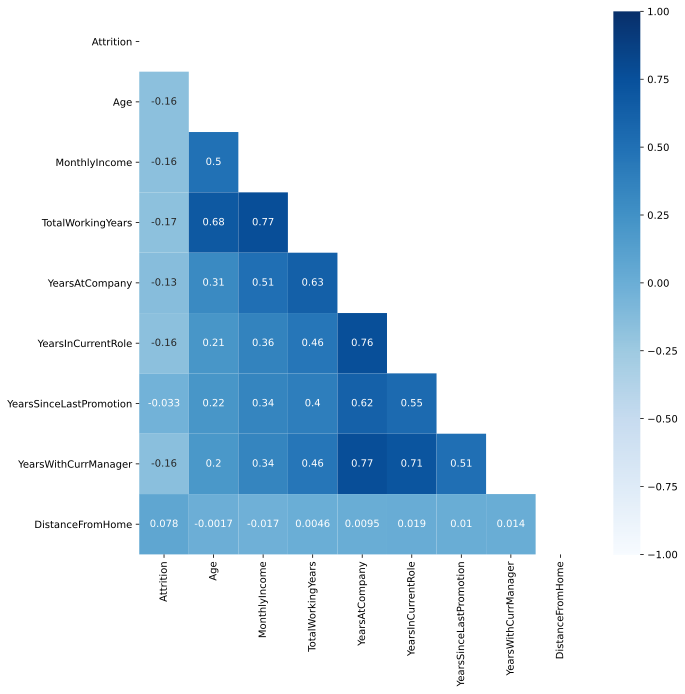

In [61]:
plt.figure(figsize=(10,10))
matrix = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,mask = matrix,cmap="Blues", vmin=-1,vmax=1,center=0)

**Result and Inferences:**

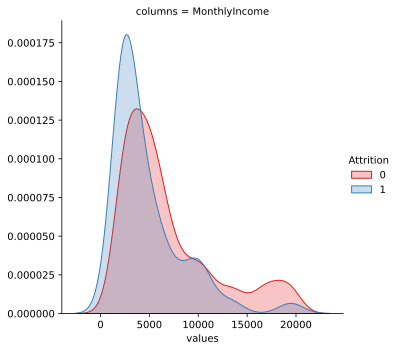

In [55]:
#melt changes a df from wide format to long format
income = df[['MonthlyIncome','Attrition']]
Income_melt = income.melt(['Attrition'], var_name='columns',  value_name='values') 


i = sns.FacetGrid(Income_melt, col='columns', hue="Attrition", palette="Set1",size=5)
i = (i.map(sns.distplot, "values", hist=False, rug=False, kde_kws={"shade": True}).add_legend())

#Employees with Low-salary tend to attrite more

### **Categorical Associations:**

In [43]:
#changing all catg to num(dummy)
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,2,3,2,4,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
1,0,3,2,2,2,3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
2,1,4,2,1,3,3,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1
3,0,4,3,1,3,3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
4,0,1,3,1,2,3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0


In [44]:
#categorical association -csv
cat_association = df_cat.corr()
cat_association.to_csv("Categorical_associations-Attrition.csv")
cat_association

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Attrition,1.000000,-0.103369,-0.130016,-0.169105,-0.103481,-0.063939,-0.074457,0.115143,-0.049538,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.029453,0.029453,-0.087716,-0.090984,0.175419,-0.246118,0.246118
EnvironmentSatisfaction,-0.103369,1.000000,-0.008278,0.001212,-0.006784,0.027627,0.003568,-0.012624,0.008496,-0.007597,0.027976,-0.025606,-0.006898,-0.024526,0.000479,-0.021299,0.064602,0.027713,-0.000508,0.000508,0.016439,-0.022180,0.009035,-0.070132,0.070132
JobInvolvement,-0.130016,-0.008278,1.000000,-0.012630,-0.021476,-0.014617,-0.045779,0.004424,0.026714,0.004789,0.023187,-0.026107,0.002079,0.003228,-0.018657,0.017103,-0.011895,-0.004519,-0.017960,0.017960,0.016815,0.028324,-0.045253,0.003507,-0.003507
JobLevel,-0.169105,0.001212,-0.012630,1.000000,-0.001944,0.037818,-0.007295,-0.021557,0.023433,-0.006157,-0.107830,0.114307,0.010409,-0.008431,0.092698,-0.014114,-0.016724,-0.054707,0.039403,-0.039403,0.037087,0.050547,-0.087072,-0.000544,0.000544
JobSatisfaction,-0.103481,-0.006784,-0.021476,-0.001944,1.000000,-0.019459,0.019802,0.027117,-0.036562,-0.024068,-0.002798,0.013499,-0.021467,0.052004,-0.023528,-0.022645,0.003380,-0.019795,-0.033252,0.033252,-0.015197,-0.010315,0.024571,-0.024539,0.024539
WorkLifeBalance,-0.063939,0.027627,-0.014617,0.037818,-0.019459,1.000000,0.005780,0.010199,-0.012640,0.047763,-0.069922,0.051320,-0.003967,-0.039728,0.018500,0.001641,0.031812,0.021962,0.002753,-0.002753,-0.009080,-0.006388,0.014921,0.027092,-0.027092
BusinessTravel_Non-Travel,-0.074457,0.003568,-0.045779,-0.007295,0.019802,0.005780,1.000000,-0.162435,-0.526850,-0.004755,-0.005013,0.007283,0.020835,0.005311,-0.030567,0.012828,-0.013389,0.004171,-0.050461,0.050461,0.057455,-0.043635,-0.004622,0.037163,-0.037163
BusinessTravel_Travel_Frequently,0.115143,-0.012624,0.004424,-0.021557,0.027117,0.010199,-0.162435,1.000000,-0.753092,-0.007485,0.003340,-0.000160,0.011818,0.031128,-0.016586,-0.005367,-0.011004,-0.023569,0.022015,-0.022015,0.005779,-0.030785,0.027734,-0.029392,0.029392
BusinessTravel_Travel_Rarely,-0.049538,0.008496,0.026714,0.023433,-0.036562,-0.012640,-0.526850,-0.753092,1.000000,0.009618,0.000465,-0.004718,-0.024073,-0.030355,0.034668,-0.003930,0.018406,0.017521,0.014682,-0.014682,-0.043287,0.055613,-0.020808,0.000539,-0.000539
Department_Human Resources,0.016832,-0.007597,0.004789,-0.006157,-0.024068,0.047763,-0.004755,-0.007485,0.009618,1.000000,-0.290754,-0.139650,0.646436,-0.068040,-0.073692,-0.049761,-0.007527,-0.019469,-0.035652,0.035652,0.016037,0.034767,-0.051443,0.006178,-0.006178


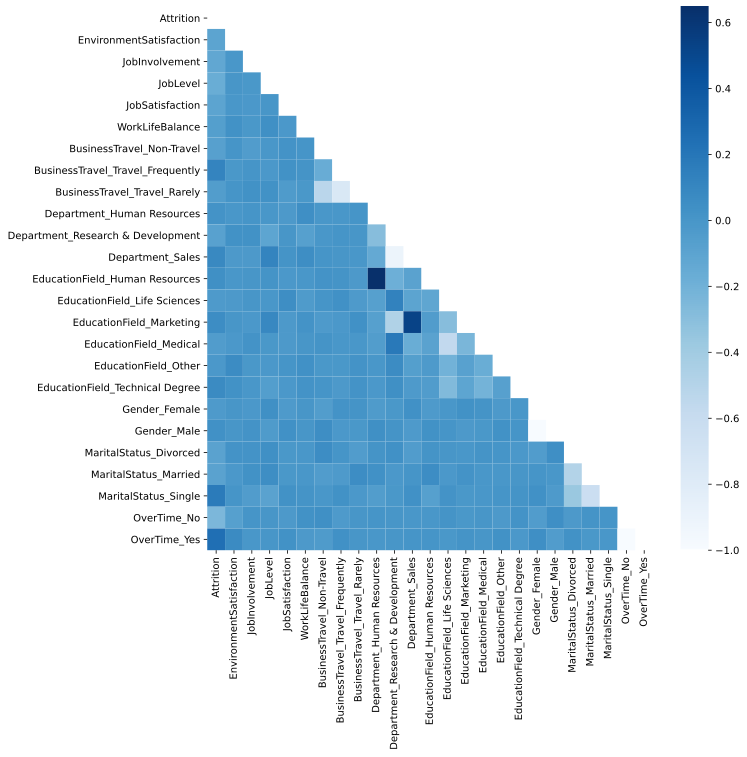

In [49]:
plt.figure(figsize=(10,10))
matrix = np.triu(cat_association)
sns.heatmap(cat_association, cmap="Blues", mask= matrix)
plt.savefig("Categorical_associations-Attrition")